In [67]:
from pathlib import Path
import matplotlib as mpl
import xarray as xr

from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter, cdic_model
log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

cdic_model

from bs_fdbck.preprocess.launch_monthly_station_collocation import launch_monthly_station_output
from bs_fdbck.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.data_info.variable_info import list_sized_vars_nonsec, list_sized_vars_noresm
import useful_scit.util.log as log
log.ger.setLevel(log.log.INFO)
import time

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

## Cases:

In [68]:
cases_noresm1 = ['OsloAero_f19_f19_mg17_act']
case_name = 'OsloAero_f19_f19_mg17_act'

In [69]:
from_t = '2009-01-01'
to_t = '2011-01-01'

### Output filename:


In [70]:
fn_output_corr_height = Path(f'Data/{case_name}_corr_height_{from_t}-{to_t}.nc')
fn_output_corr_height_renamed = Path(f'Data/{case_name}_corr_height_rename_{from_t}-{to_t}.nc')
fn_units_desc = Path(f'Data/{case_name}_corr_height_rename_{from_t}-{to_t}/{case_name}_units_description.csv')

In [71]:
fn_units_desc.parent.mkdir(exist_ok=True)

## Cases:

## Settings:

In [72]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

## Variables

ddry_nucsol
ddry_aitinsol
ddry_aitsol
ddry_accsol
ddry_corsol
n_nucsol
n_aitinsol
n_aitsol
n_accsol
n_corsol
cdnc
n100
n70
n50
n30
activation supersaturation
vertical velocity
cloud fraction
temperature

In [73]:

varl =['N100','N50','N30','N70',
       'AWNC',
       #'AWNC_incld',
       'AREL', 
       'FREQL', 
       'FREQI', 
       #'ACTNL_incld',
       'ACTNL',
       'ACTREL', 
       'ACTREI', 
       'FCTL', 'FCTI',
       'Z3',
       'Smax_cldv',
       'Smax_cldv_supZero',
       'Smax_incld',
       'Smax_incld_supZero',
       'WSUB',
       'WTKE',
       'WSUBI',
       'T',
       'LCLOUD', # liquid cloud fraction used in stratus activation
       'CLDTOT',
       'CLOUD',
       'CLOUDCOVER_CLUBB',
       'CLOUDFRAC_CLUBB',
       
      ] 

In [74]:
varlist = varl
    
c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
if c.check_if_load_raw_necessary(varlist ):
    
    time1 = time.time()
    a = c.make_station_data_merge_monthly(varlist)
    print(a)
    time2 = time.time()
    print('DONE : took {:.3f} s'.format( (time2-time1)))
else:
    print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/N100_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/N50_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/N30_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/N70_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/AWNC_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/AREL_OsloAero_f19_

In [75]:
c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
ds = c.get_collocated_dataset(varl)
if 'location' in ds.coords:
    ds = ds.rename({'location':'station'})


2022-10-13 17:00:50,882 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/N100_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/N50_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/N30_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/N70_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/AWNC_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocate

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/N100_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/N50_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/N30_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/N70_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/AWNC_OsloAero_f19_f19_mg17_act_2009-01-01_2011-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_f19_f19_mg17_act/AREL_OsloAero_f19_

In [76]:
import pandas as pd

In [77]:
df_loc = pd.read_csv('locations.csv', index_col =0)

In [78]:
ds

<xarray.Dataset>
Dimensions:             (time: 5841, station: 5, lev: 32, ilev: 33)
Coordinates:
  * time                (time) datetime64[ns] 2009-01-01 ... 2011-01-01
  * station             (station) object 'Puijo' 'Zeppelin' ... 'Jungfraujoch'
  * lev                 (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev                (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
Data variables: (12/27)
    ACTNL               (station, time) float32 dask.array<chunksize=(5, 5841), meta=np.ndarray>
    ACTREI              (station, time) float32 dask.array<chunksize=(5, 5841), meta=np.ndarray>
    ACTREL              (station, time) float32 dask.array<chunksize=(5, 5841), meta=np.ndarray>
    AREL                (station, time, lev) float32 dask.array<chunksize=(5, 5841, 32), meta=np.ndarray>
    AWNC                (station, time, lev) float32 dask.array<chunksize=(5, 5841, 32), meta=np.ndarray>
    CLDTOT              (station, time) float32 dask.array<chunksize=(5, 5841), meta=np.ndarray>
    ...                  ...
    Smax_incld_supZero  (station, time, lev) float32 dask.array<chunksize=(5, 5841, 32), meta=np.ndarray>
    T                   (station, time, lev) float32 dask.array<chunksize=(5, 5841, 32), meta=np.ndarray>
    WSUB                (station, time, lev) float32 dask.array<chunksize=(5, 5841, 32), meta=np.ndarray>
    WSUBI               (station, time, lev) float32 dask.array<chunksize=(5, 5841, 32), meta=np.ndarray>
    WTKE                (station, time, lev) float32 dask.array<chunksize=(5, 5841, 32), meta=np.ndarray>
    Z3                  (station, time, lev) float32 dask.array<chunksize=(5, 5841, 32), meta=np.ndarray>

In [79]:
from bs_fdbck.util.imports.import_fields_xr_v2 import xr_import_NorESM


## Import geopotential height: 


In [80]:
_ds = xr.Dataset()

for st in df_loc.columns:
    _lat = df_loc.loc['lat', st]
    _lon = df_loc.loc['lon', st]
    _ds[st] = ds['Z3'].sel(station=st).copy()
    
    print(_lat)
    print(st)

62.90566304
Puijo
78.9072
Zeppelin
35.34
Finokalia
67.967
Pallas
46.0
Jungfraujoch


## Z3 does not vary. with time:

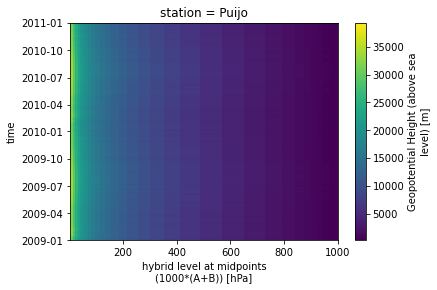

In [81]:
ds['Z3'].isel(station=0).plot()

In [82]:
ds['Z3'] = ds['Z3'].isel(time=0)

In [83]:
df_loc

Puijo  Zeppelin  Finokalia   Pallas  Jungfraujoch
lon             27.653497   11.8867      25.67   24.116           8.0
lat             62.905663   78.9072      35.34   67.967          46.0
height (masl)  306.000000  474.0000     252.00  565.000        3580.0

Puijo
306.0


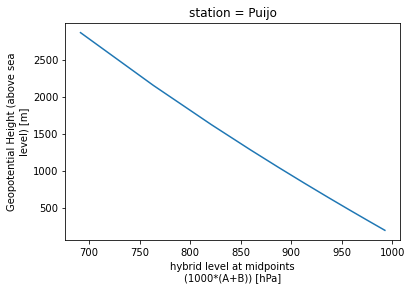

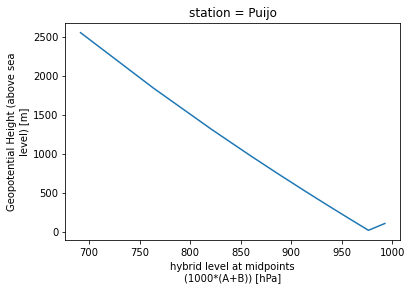

<xarray.DataArray 'Z3' ()>
array(30)
Coordinates:
    station  <U5 'Puijo'
Attributes:
    mdims:      1
    units:      m
    long_name:  Geopotential Height (above sea level)
Zeppelin
474.0


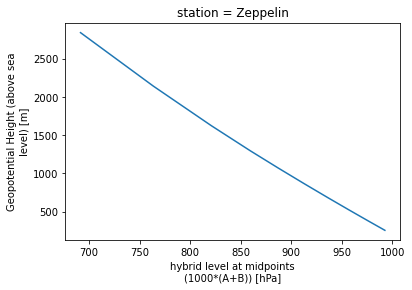

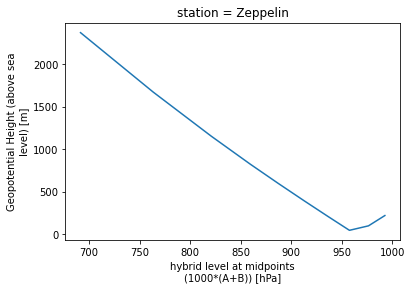

<xarray.DataArray 'Z3' ()>
array(29)
Coordinates:
    station  <U8 'Zeppelin'
Attributes:
    mdims:      1
    units:      m
    long_name:  Geopotential Height (above sea level)
Finokalia
252.0


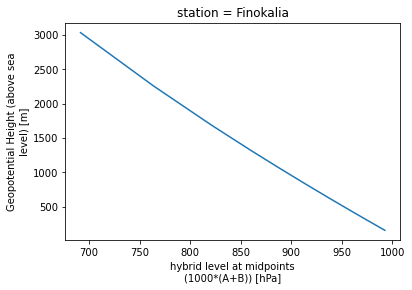

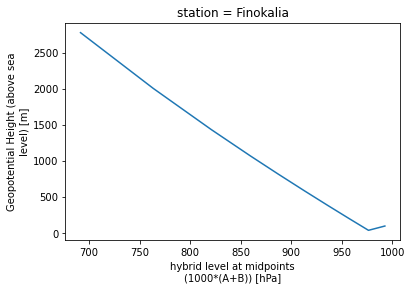

<xarray.DataArray 'Z3' ()>
array(30)
Coordinates:
    station  <U9 'Finokalia'
Attributes:
    mdims:      1
    units:      m
    long_name:  Geopotential Height (above sea level)
Pallas
565.0


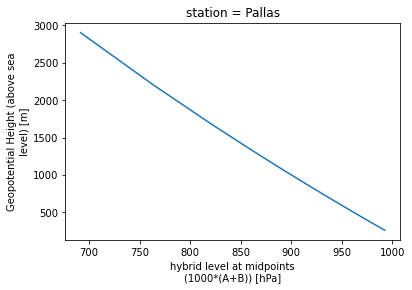

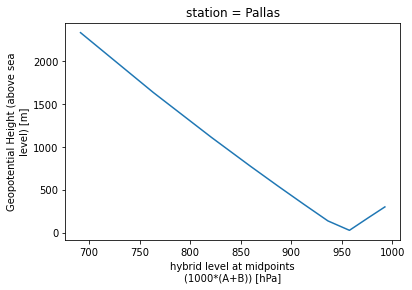

<xarray.DataArray 'Z3' ()>
array(29)
Coordinates:
    station  <U6 'Pallas'
Attributes:
    mdims:      1
    units:      m
    long_name:  Geopotential Height (above sea level)
Jungfraujoch
3580.0


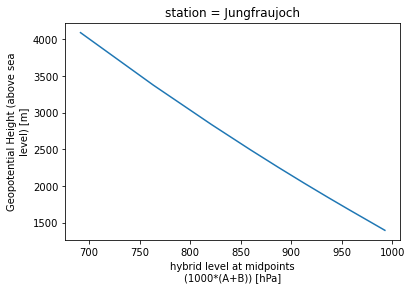

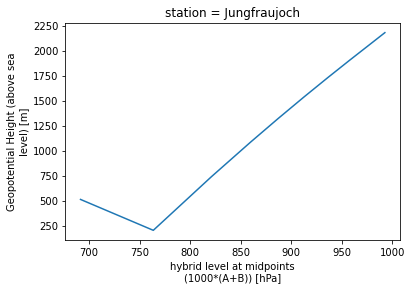

<xarray.DataArray 'Z3' ()>
array(23)
Coordinates:
    station  <U12 'Jungfraujoch'
Attributes:
    mdims:      1
    units:      m
    long_name:  Geopotential Height (above sea level)


In [84]:
dic_ds_station = dict()

for st in df_loc.columns:
    print(st)
    _ds = ds.sel(station=st)
    height = df_loc.loc['height (masl)', st]
    print(height)
    _ds['Z3'].isel(lev=slice(-10,None)).plot()
    plt.show()
    da_diff = np.abs(_ds['Z3']-height)
    da_diff.isel(lev=slice(-10,None)).plot()
    plt.show()
    index = da_diff.argmin().compute()
    print(index) 
    dic_ds_station[st] = _ds.drop('Z3').isel(lev=index).copy().drop('lev')

ls = [dic_ds_station[st] for st in dic_ds_station.keys()]

ds_corr_height = xr.concat(ls, dim ='station')

In [85]:
ds_corr_height.drop(['CLOUDCOVER_CLUBB','ilev'])

<xarray.Dataset>
Dimensions:             (time: 5841, station: 5)
Coordinates:
  * time                (time) datetime64[ns] 2009-01-01 ... 2011-01-01
  * station             (station) <U12 'Puijo' 'Zeppelin' ... 'Jungfraujoch'
Data variables: (12/25)
    ACTNL               (station, time) float32 dask.array<chunksize=(1, 5841), meta=np.ndarray>
    ACTREI              (station, time) float32 dask.array<chunksize=(1, 5841), meta=np.ndarray>
    ACTREL              (station, time) float32 dask.array<chunksize=(1, 5841), meta=np.ndarray>
    AREL                (station, time) float32 dask.array<chunksize=(1, 5841), meta=np.ndarray>
    AWNC                (station, time) float32 dask.array<chunksize=(1, 5841), meta=np.ndarray>
    CLDTOT              (station, time) float32 dask.array<chunksize=(1, 5841), meta=np.ndarray>
    ...                  ...
    Smax_incld          (station, time) float32 dask.array<chunksize=(1, 5841), meta=np.ndarray>
    Smax_incld_supZero  (station, time) float32 dask.array<chunksize=(1, 5841), meta=np.ndarray>
    T                   (station, time) float32 dask.array<chunksize=(1, 5841), meta=np.ndarray>
    WSUB                (station, time) float32 dask.array<chunksize=(1, 5841), meta=np.ndarray>
    WSUBI               (station, time) float32 dask.array<chunksize=(1, 5841), meta=np.ndarray>
    WTKE                (station, time) float32 dask.array<chunksize=(1, 5841), meta=np.ndarray>

## Write to file: 

In [86]:
ds_corr_height.drop(['CLOUDCOVER_CLUBB','ilev']).to_netcdf(fn_output_corr_height)

## Tidy up data:

In [87]:
ds_corr_height = xr.open_dataset(fn_output_corr_height, decode_times=True)

ds_corr_height['station'] = ds_corr_height['station'].astype(str)

### CDNC

In [88]:
ds_corr_height['AWNC_incld'] = ds_corr_height['AWNC']/ds_corr_height['FREQL']

In [89]:
ds_corr_height['ACTNL_incld'] = ds_corr_height['ACTNL']/ds_corr_height['FCTL']

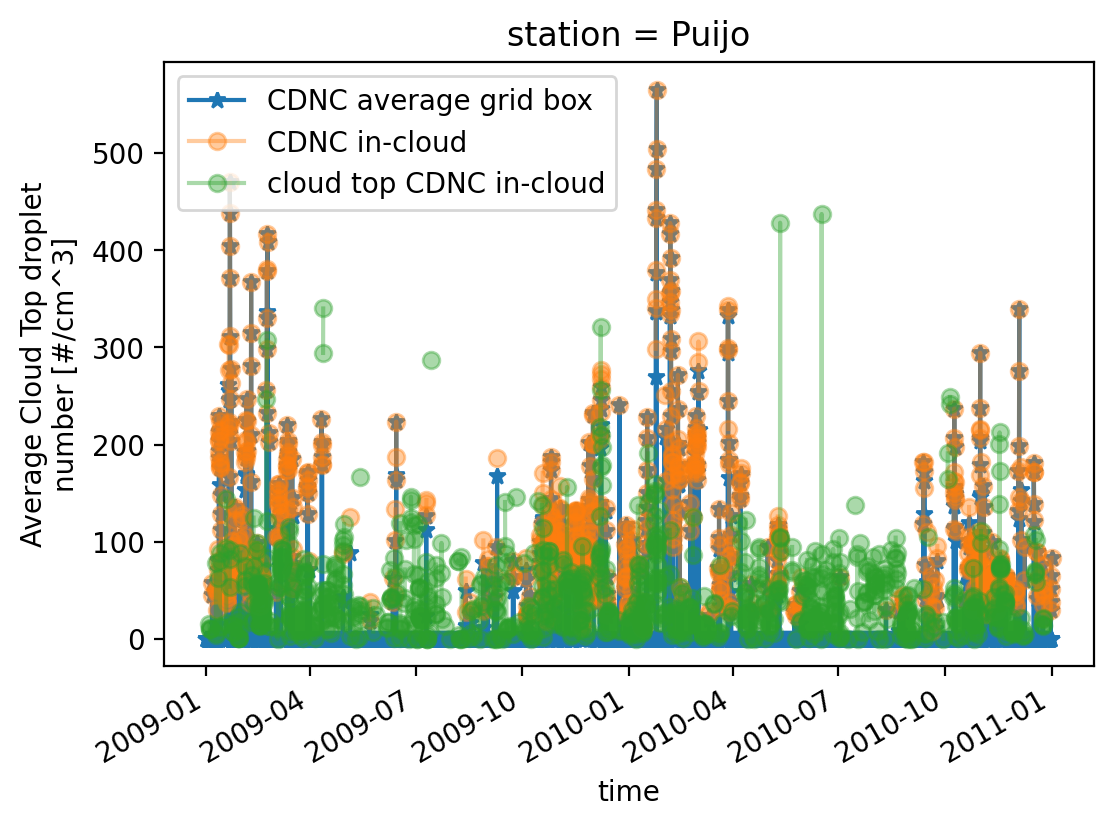

In [90]:
plt.figure(dpi=200)
ds_corr_height['AWNC'].sel(station='Puijo').plot(marker='*', label='CDNC average grid box')

ds_corr_height['AWNC_incld'].sel(station='Puijo').plot(marker='o', alpha=.4, label='CDNC in-cloud')
ds_corr_height['ACTNL_incld'].sel(station='Puijo').plot(marker='o', alpha=.4, label='cloud top CDNC in-cloud')
#ds_corr_height['ACTNL'].sel(station='Puijo').plot(marker='o', alpha=.4)
plt.legend()

### Smax

In [91]:
ds_corr_height['Smax_cldv'] = ds_corr_height['Smax_cldv'].where(ds_corr_height['Smax_cldv_supZero'])
ds_corr_height['Smax_incld'] = ds_corr_height['Smax_incld'].where(ds_corr_height['Smax_incld_supZero'])
for v in ['Smax_cldv','Smax_incld']:
    ds_corr_height[v].attrs['units'] = 1

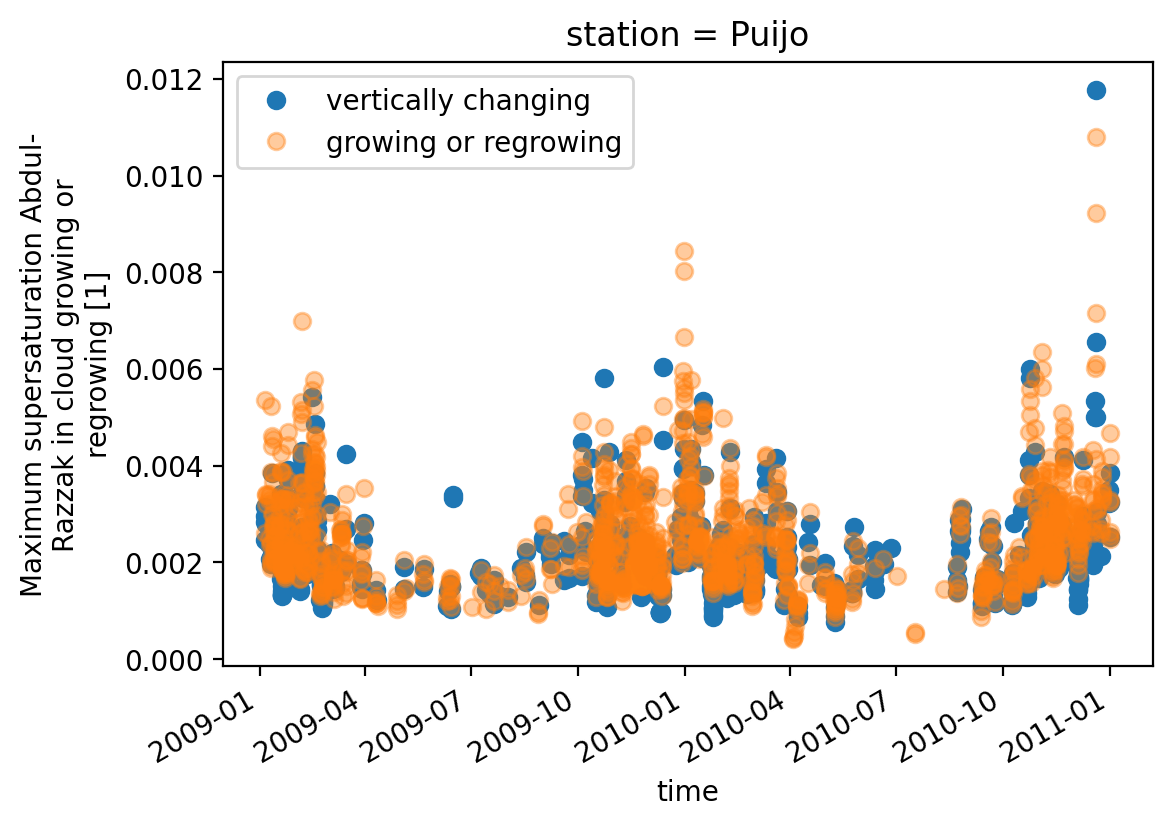

In [92]:
fig, ax = plt.subplots(dpi=200)
ds_corr_height['Smax_cldv'].sel(station='Puijo').plot(marker='o', linewidth=0, label='vertically changing')
#ds_corr_height['FREQI'].sel(station='Puijo').plot(marker='d', alpha=.4)
#(ds_corr_height['FREQL']+ds_corr_height['FREQI']).sel(station='Puijo').plot(marker='*', alpha=0.5)

ds_corr_height['Smax_incld'].sel(station='Puijo').plot(marker='o', alpha=.4, linewidth=0, label='growing or regrowing')

plt.legend()

## Change units:

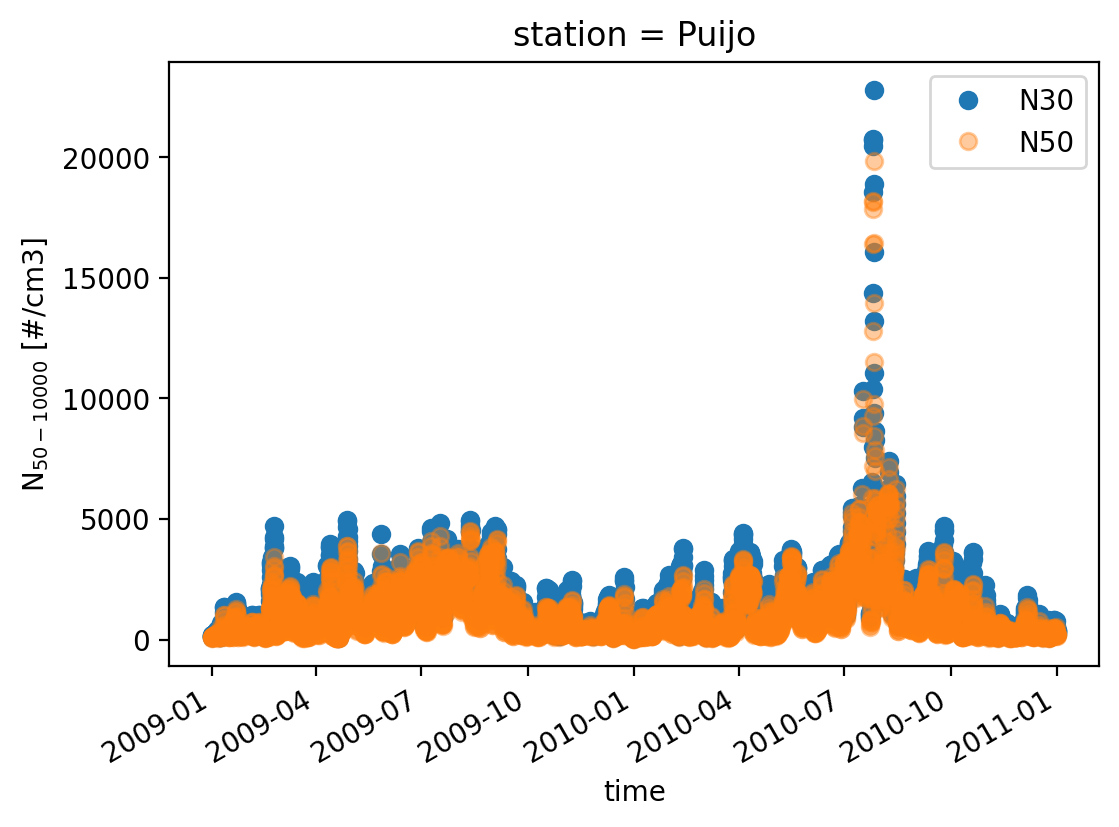

In [93]:
fig, ax = plt.subplots(dpi=200)
ds_corr_height['N30'].sel(station='Puijo').plot(marker='o', linewidth=0, label='N30')
#ds_corr_height['FREQI'].sel(station='Puijo').plot(marker='d', alpha=.4)
#(ds_corr_height['FREQL']+ds_corr_height['FREQI']).sel(station='Puijo').plot(marker='*', alpha=0.5)

ds_corr_height['N50'].sel(station='Puijo').plot(marker='o', alpha=.4, linewidth=0,label='N50')

plt.legend()

In [94]:
vars_cm3_to_m3 = ['N30','N50','N70','N100','AWNC_incld','ACTNL_incld']

In [95]:
cm3_to_m3 = 1e-6

In [96]:
for v in vars_cm3_to_m3:
    print(ds_corr_height[v].units)
    if 'cm'  in ds_corr_height[v].units:
        ds_corr_height[v] = ds_corr_height[v]/cm3_to_m3
        ds_corr_height[v].attrs['units'] = 'm-3'
        
    print(ds_corr_height[v].units)

#/cm3
m-3
#/cm3
m-3
#/cm3
m-3
#/cm3
m-3
#/cm^3
m-3
#/cm^3
m-3


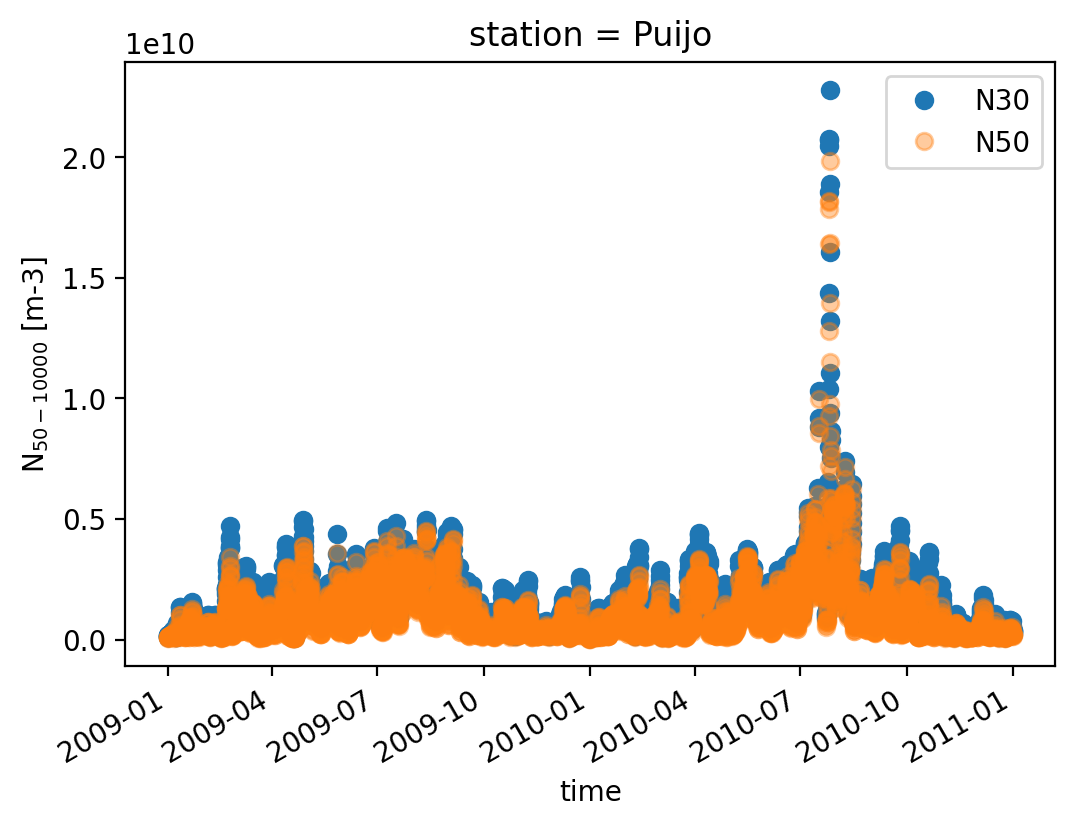

In [97]:
fig, ax = plt.subplots(dpi=200)
ds_corr_height['N30'].sel(station='Puijo').plot(marker='o', linewidth=0, label='N30')
#ds_corr_height['FREQI'].sel(station='Puijo').plot(marker='d', alpha=.4)
#(ds_corr_height['FREQL']+ds_corr_height['FREQI']).sel(station='Puijo').plot(marker='*', alpha=0.5)

ds_corr_height['N50'].sel(station='Puijo').plot(marker='o', alpha=.4, linewidth=0,label='N50')

plt.legend()

## Set unit:

In [98]:
ds_corr_height['LCLOUD'].attrs['units'] = 1

### Rename

In [99]:
rename_dic = dict(
    N100='n100',
    N30='n30',
    N50='n50',
    N70='n70',
    WSUB='vertical_velocity',
    LCLOUD='cloud_fraction',
    AWNC_incld = 'cdnc',
    ACTNL_incld = 'cdnc_cloud_top',
    T='temperature',
    Smax_cldv='activation_supersaturation',
    
    
)

In [100]:
ds_corr_height_rn = ds_corr_height.rename(rename_dic)

## Drop WT

In [101]:
ds_corr_height_rn = ds_corr_height_rn.drop('WTKE')#.drop(.rename(rename_dic)

## TO netcdf 

In [102]:
ds_corr_height_rn.to_netcdf(fn_output_corr_height_renamed)

## To csv

In [103]:
for st in ds_corr_height['station'].values:
    print(st)
    fn_out = fn_output_corr_height_renamed.parent/ (fn_output_corr_height_renamed.stem)/ (fn_output_corr_height_renamed.stem+ f'_{st}.csv')
    print(fn_out)
    df = ds_corr_height_rn.sel(station=st).to_dataframe()
    df.to_csv(fn_out)
    
#ds_corr_height_rn.to_dataframe()

Puijo
Data/OsloAero_f19_f19_mg17_act_corr_height_rename_2009-01-01-2011-01-01/OsloAero_f19_f19_mg17_act_corr_height_rename_2009-01-01-2011-01-01_Puijo.csv
Zeppelin
Data/OsloAero_f19_f19_mg17_act_corr_height_rename_2009-01-01-2011-01-01/OsloAero_f19_f19_mg17_act_corr_height_rename_2009-01-01-2011-01-01_Zeppelin.csv
Finokalia
Data/OsloAero_f19_f19_mg17_act_corr_height_rename_2009-01-01-2011-01-01/OsloAero_f19_f19_mg17_act_corr_height_rename_2009-01-01-2011-01-01_Finokalia.csv
Pallas
Data/OsloAero_f19_f19_mg17_act_corr_height_rename_2009-01-01-2011-01-01/OsloAero_f19_f19_mg17_act_corr_height_rename_2009-01-01-2011-01-01_Pallas.csv
Jungfraujoch
Data/OsloAero_f19_f19_mg17_act_corr_height_rename_2009-01-01-2011-01-01/OsloAero_f19_f19_mg17_act_corr_height_rename_2009-01-01-2011-01-01_Jungfraujoch.csv



## Extract units

In [104]:
df_units = pd.DataFrame(index = ['long_name','unit'])
for v in ds_corr_height_rn.keys():
    print(v)
    unit = ds_corr_height_rn[v].units
    print(unit)
    long_name = ds_corr_height_rn[v].long_name
    print(long_name)
    df_units[v] = [long_name,unit]

ACTNL
#/cm^3
Average Cloud Top droplet number
ACTREI
Micron
Average Cloud Top ice effective radius
ACTREL
Micron
Average Cloud Top droplet effective radius
AREL
Micron
Average droplet effective radius
AWNC
#/cm^3
Average cloud water number conc
CLDTOT
fraction
Vertically-integrated total cloud
CLOUD
fraction
Cloud fraction
CLOUDFRAC_CLUBB
fraction
Cloud Fraction
FCTI
fraction
Fractional occurrence of cloud top ice
FCTL
fraction
Fractional occurrence of cloud top liquid
FREQI
fraction
Fractional occurrence of ice
FREQL
fraction
Fractional occurrence of liquid
cloud_fraction
1
Liquid cloud fraction used in stratus activation
n100
m-3
N$_{100-10000}$
n30
m-3
N$_{30-10000}$
n50
m-3
N$_{50-10000}$
n70
m-3
N$_{70-10000}$
activation_supersaturation
1
Maximum supersaturation Abdul-Razzak in vertically changing clouds
Smax_cldv_supZero
m
0 if Smax_cldv=0, 1 if Smax_cldv>0
Smax_incld
1
Maximum supersaturation Abdul-Razzak in cloud growing or regrowing
Smax_incld_supZero
m
0 if Smax_incld=0, 1 if

In [105]:
df_unitsT = df_units.T

df_unitsT.index= df_unitsT.index.rename('variable_name')

df_unitsT.to_csv(fn_units_desc)

## Extra plots: 

No handles with labels found to put in legend.


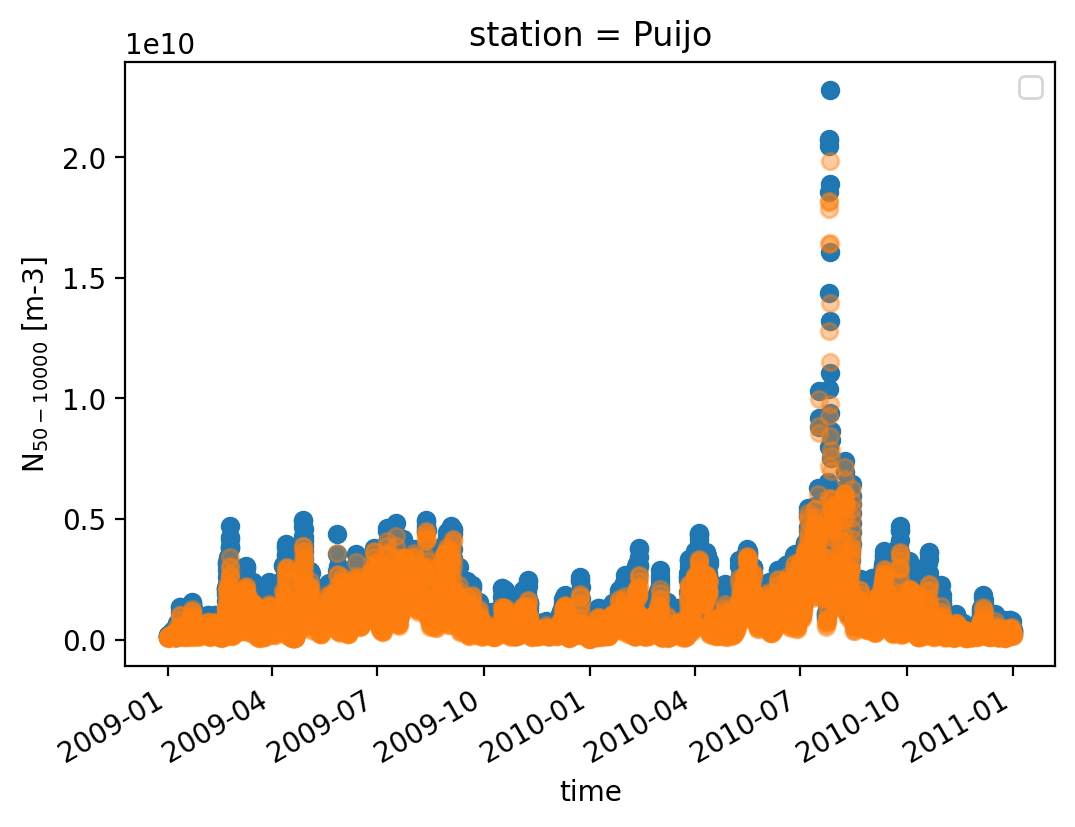

In [40]:
fig, ax = plt.subplots(dpi=200)
ds_corr_height['N30'].sel(station='Puijo').plot(marker='o', linewidth=0, )
#ds_corr_height['FREQI'].sel(station='Puijo').plot(marker='d', alpha=.4)
#(ds_corr_height['FREQL']+ds_corr_height['FREQI']).sel(station='Puijo').plot(marker='*', alpha=0.5)

ds_corr_height['N50'].sel(station='Puijo').plot(marker='o', alpha=.4, linewidth=0)

plt.legend()

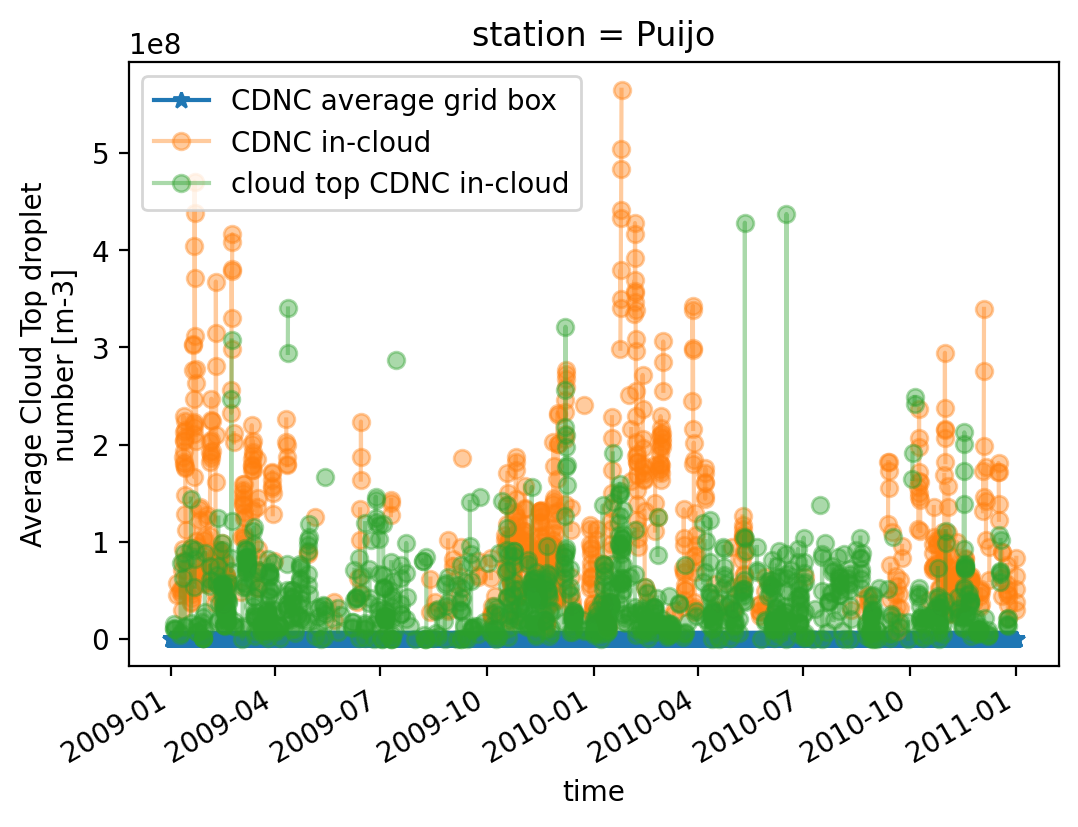

In [41]:
plt.figure(dpi=200)
ds_corr_height['AWNC'].sel(station='Puijo').plot(marker='*', label='CDNC average grid box')

ds_corr_height['AWNC_incld'].sel(station='Puijo').plot(marker='o', alpha=.4, label='CDNC in-cloud')
ds_corr_height['ACTNL_incld'].sel(station='Puijo').plot(marker='o', alpha=.4, label='cloud top CDNC in-cloud')
#ds_corr_height['ACTNL'].sel(station='Puijo').plot(marker='o', alpha=.4)
plt.legend()

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/plot/plot.py:1476: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  primitive = ax.pcolormesh(x, y, z, **kwargs)


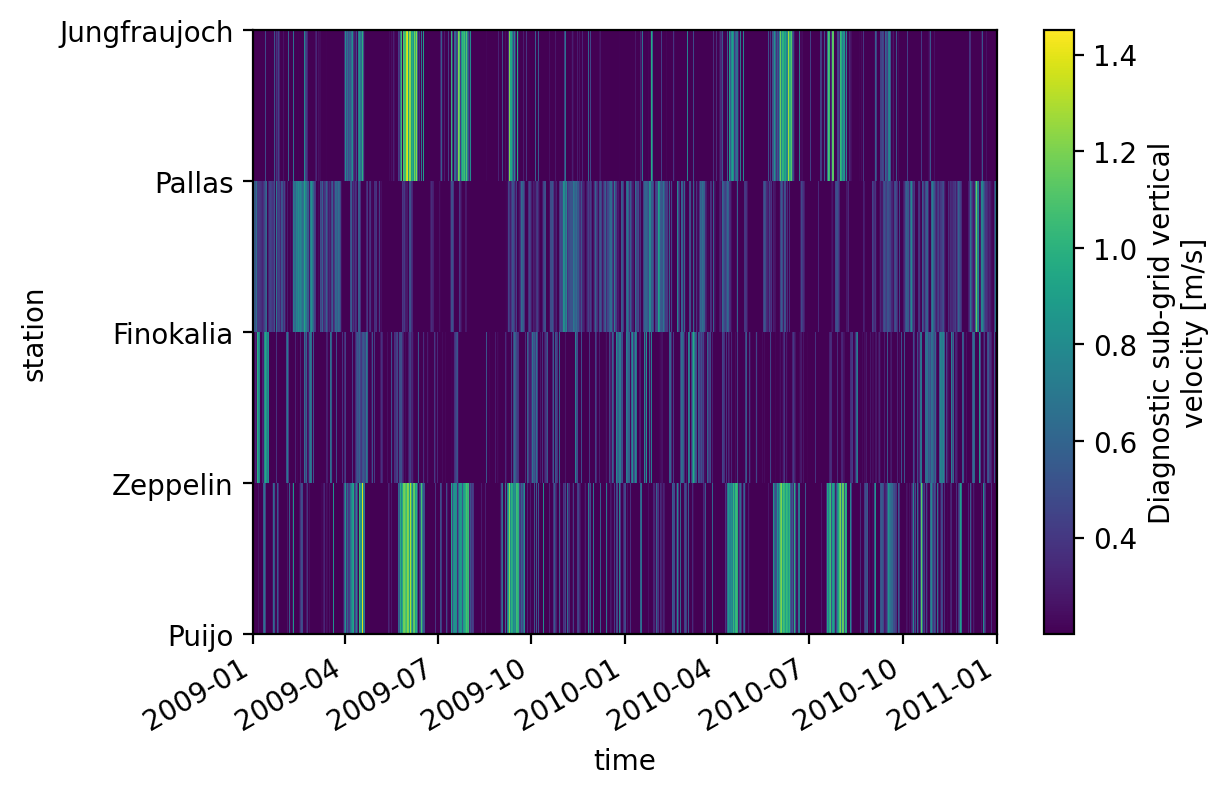

In [42]:
plt.figure(dpi=200)
ds_corr_height['WSUB'].plot()

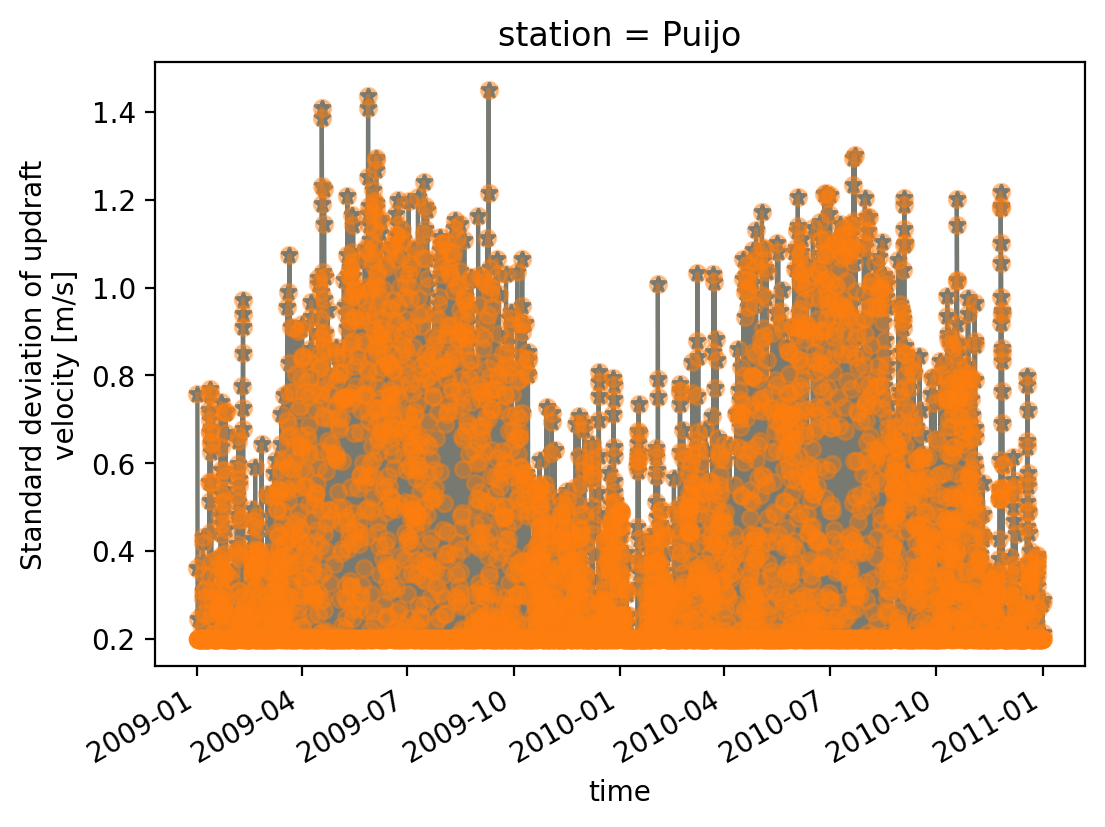

In [43]:
plt.figure(dpi=200)
ds_corr_height['WSUB'].sel(station='Puijo').plot(marker='*')

ds_corr_height['WTKE'].sel(station='Puijo').plot(marker='o', alpha=.4)

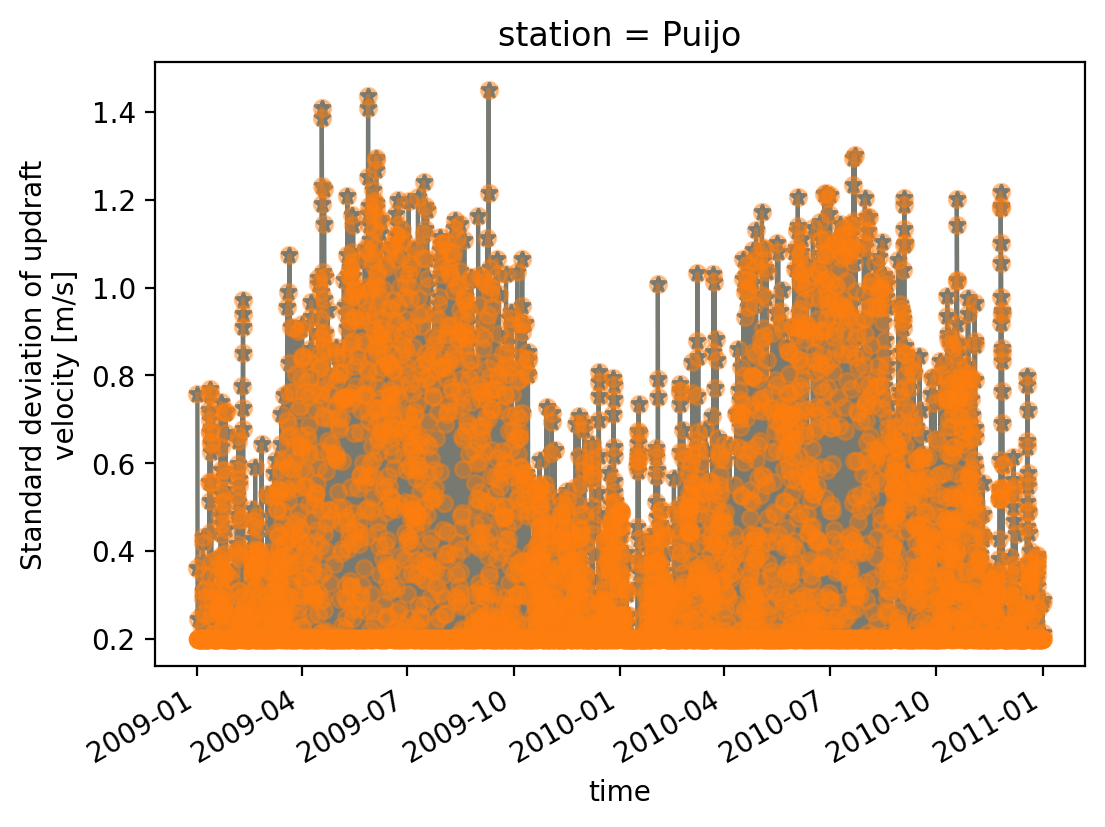

In [44]:
plt.figure(dpi=200)
ds_corr_height['WSUB'].sel(station='Puijo').plot(marker='*')

ds_corr_height['WTKE'].sel(station='Puijo').plot(marker='o', alpha=.4)

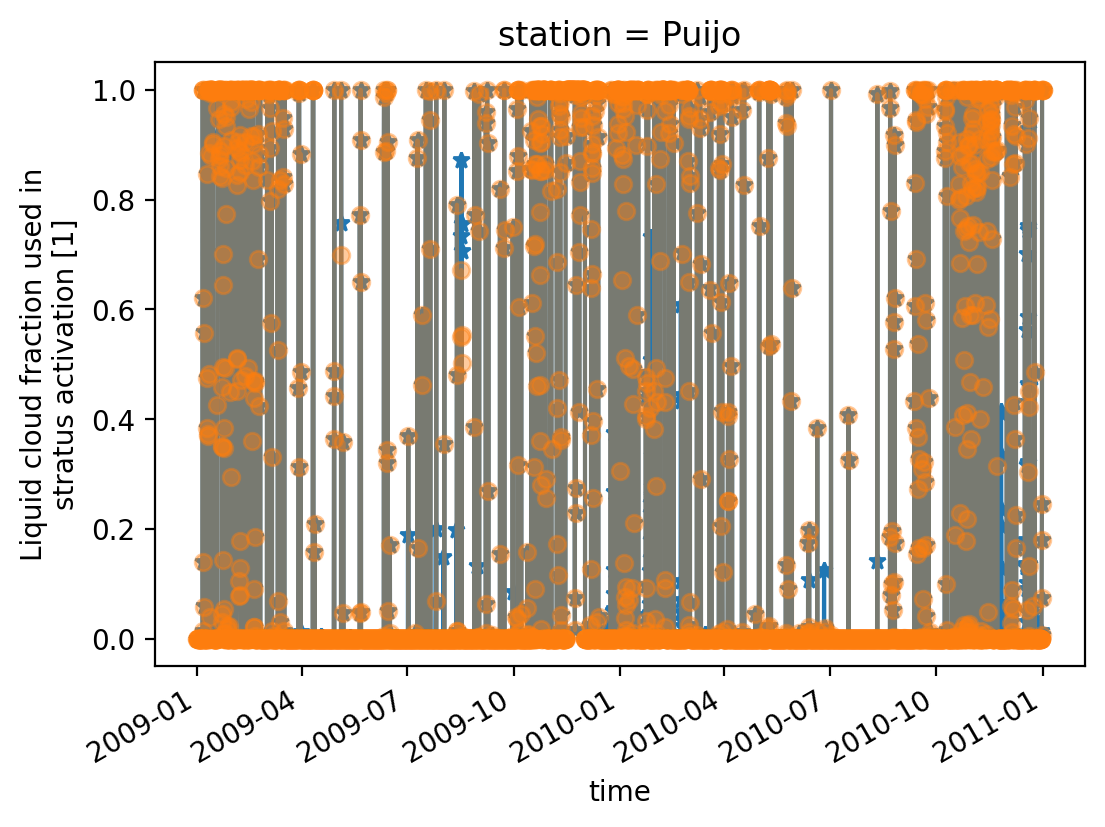

In [45]:
plt.figure(dpi=200)
ds_corr_height['CLOUD'].sel(station='Puijo').plot(marker='*')

ds_corr_height['LCLOUD'].sel(station='Puijo').plot(marker='o', alpha=.4)

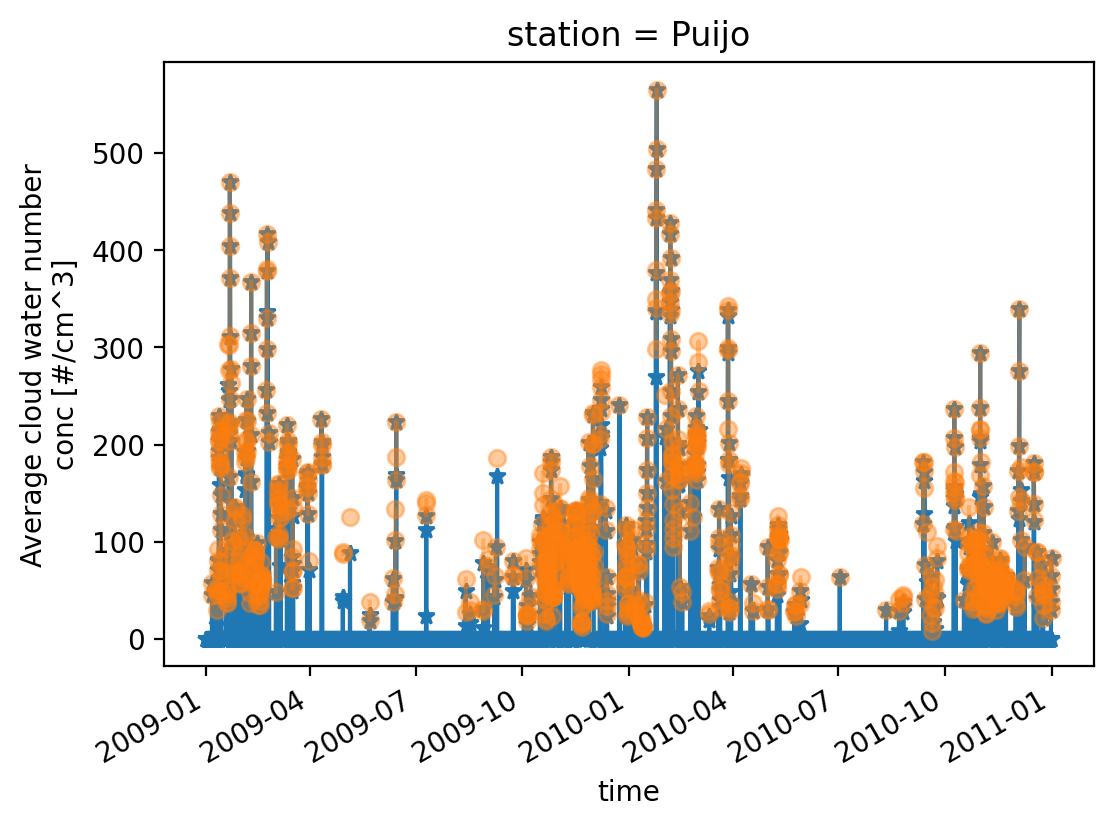

In [46]:
plt.figure(dpi=200)
ds_corr_height['AWNC'].sel(station='Puijo').plot(marker='*')

(ds_corr_height['AWNC']/ds_corr_height['FREQL']).sel(station='Puijo').plot(marker='o', alpha=.4)

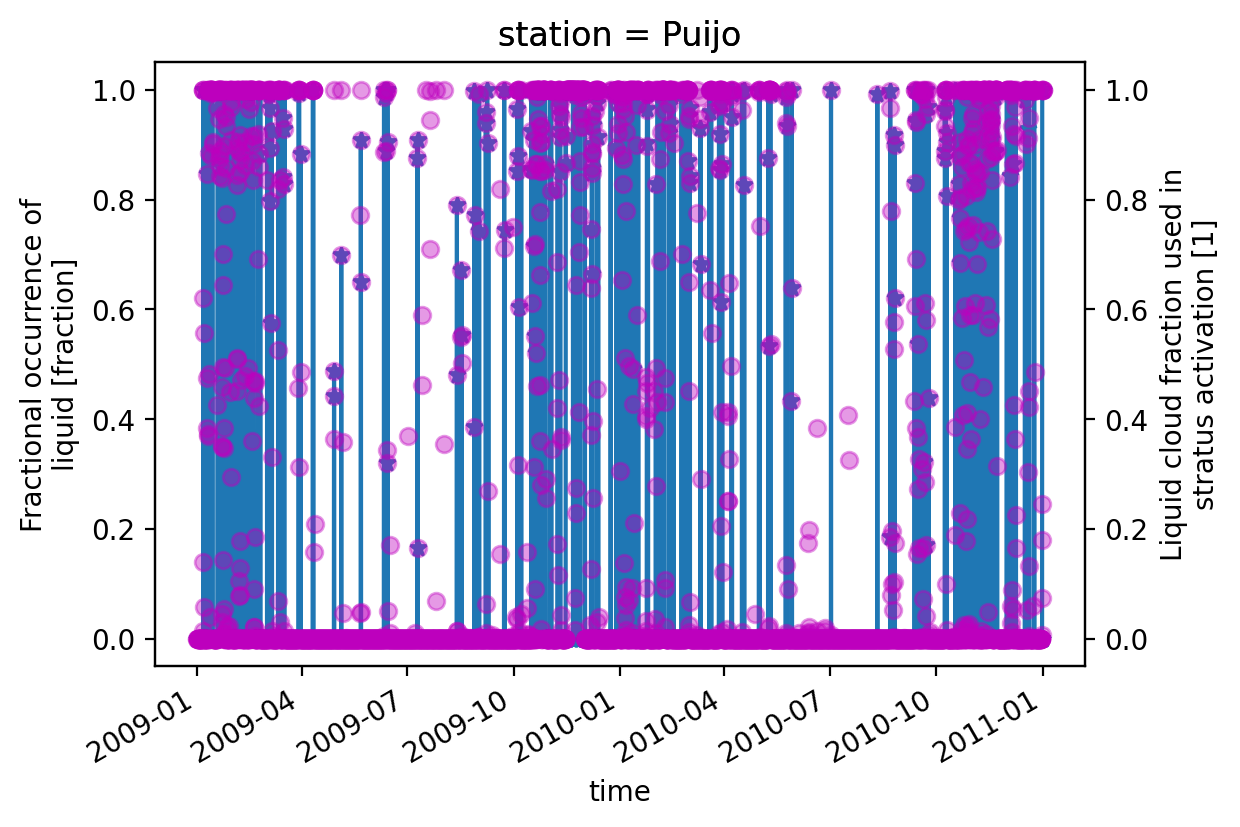

In [47]:
fig, ax = plt.subplots(dpi=200)
ds_corr_height['FREQL'].sel(station='Puijo').plot(marker='*')
#ds_corr_height['FREQI'].sel(station='Puijo').plot(marker='d', alpha=.4)
#(ds_corr_height['FREQL']+ds_corr_height['FREQI']).sel(station='Puijo').plot(marker='*', alpha=0.5)

ds_corr_height['LCLOUD'].sel(station='Puijo').plot(marker='o', alpha=.4, linewidth=0, ax=ax.twinx(), c='m')
#(ds_corr_height['FCTI']+ds_corr_height['FCTL']).sel(station='Puijo').plot(marker='o', alpha=.4, linewidth=0)

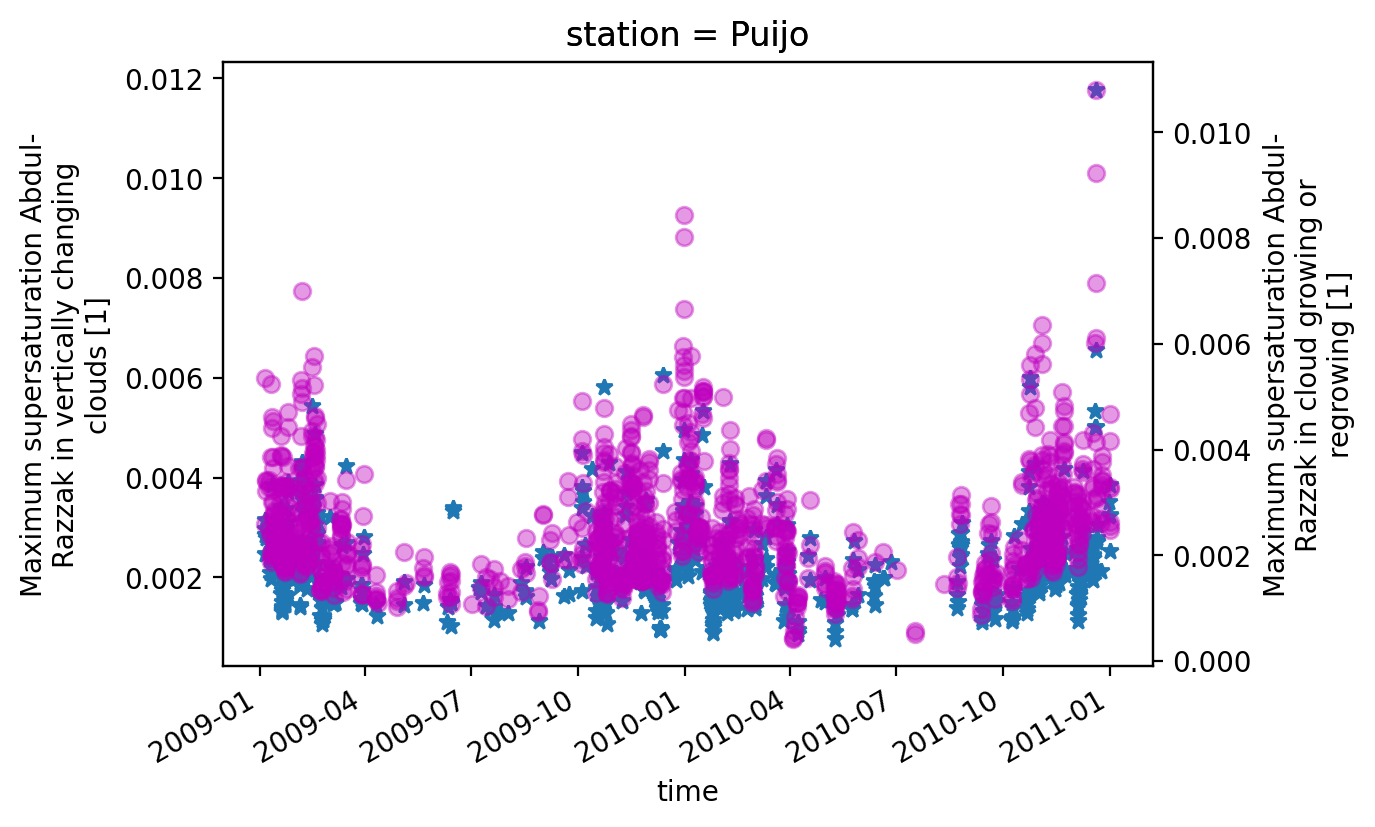

In [48]:
fig, ax = plt.subplots(dpi=200)
ds_corr_height['Smax_cldv'].sel(station='Puijo').plot(marker='*', linewidth=0)
#ds_corr_height['FREQI'].sel(station='Puijo').plot(marker='d', alpha=.4)
#(ds_corr_height['FREQL']+ds_corr_height['FREQI']).sel(station='Puijo').plot(marker='*', alpha=0.5)

ds_corr_height['Smax_incld'].sel(station='Puijo').plot(marker='o', alpha=.4, linewidth=0, ax=ax.twinx(), c='m')
#(ds_corr_height['FCTI']+ds_corr_height['FCTL']).sel(station='Puijo').plot(marker='o', alpha=.4, linewidth=0)

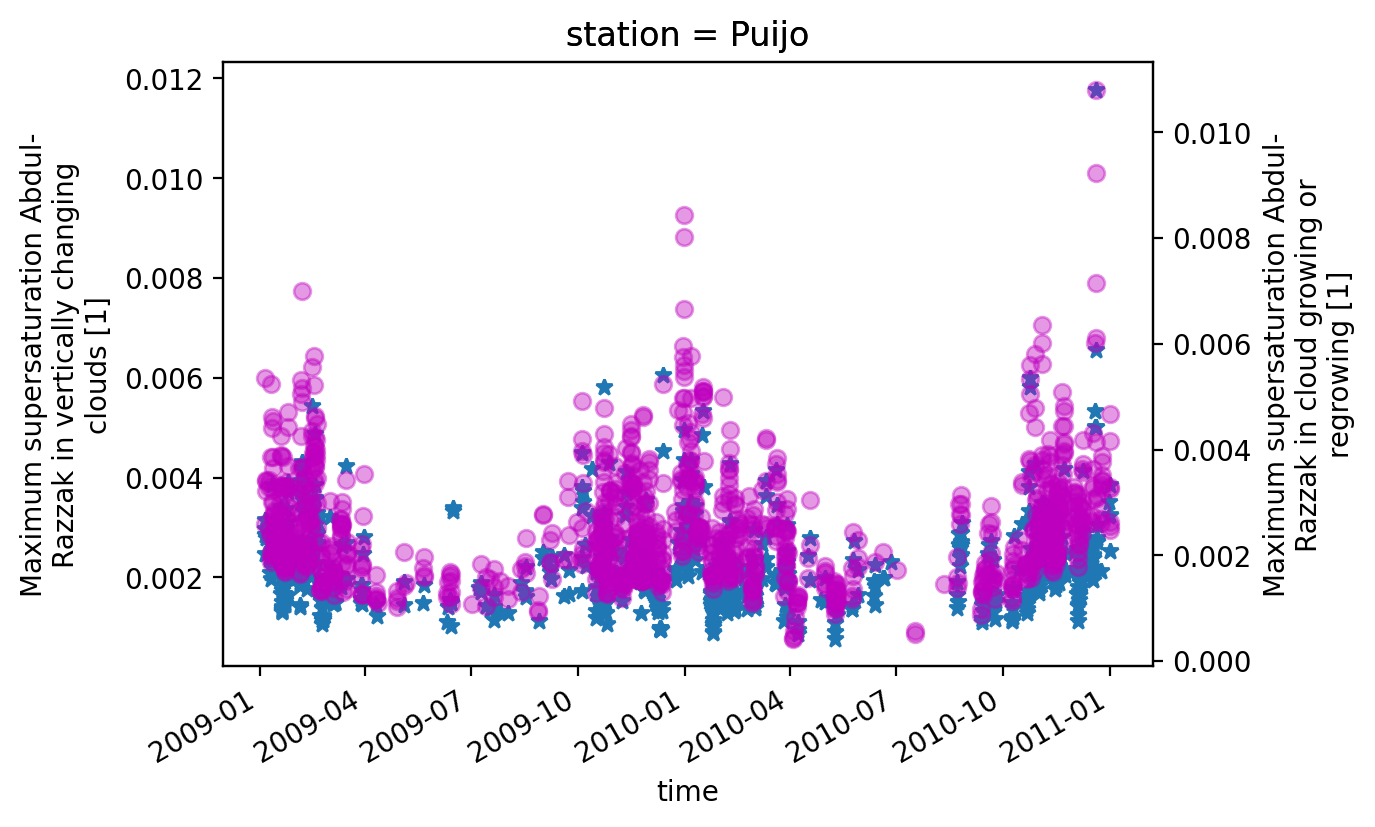

In [49]:
fig, ax = plt.subplots(dpi=200)
ds_corr_height['Smax_cldv'].where(ds_corr_height['Smax_cldv_supZero']>0).sel(station='Puijo').plot(marker='*', linewidth=0)
#ds_corr_height['FREQI'].sel(station='Puijo').plot(marker='d', alpha=.4)
#(ds_corr_height['FREQL']+ds_corr_height['FREQI']).sel(station='Puijo').plot(marker='*', alpha=0.5)

ds_corr_height['Smax_incld'].where(ds_corr_height['Smax_incld_supZero']>0).sel(station='Puijo').plot(marker='o', alpha=.4, linewidth=0, ax=ax.twinx(), c='m')
#(ds_corr_height['FCTI']+ds_corr_height['FCTL']).sel(station='Puijo').plot(marker='o', alpha=.4, linewidth=0)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/plot/plot.py:1476: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  primitive = ax.pcolormesh(x, y, z, **kwargs)


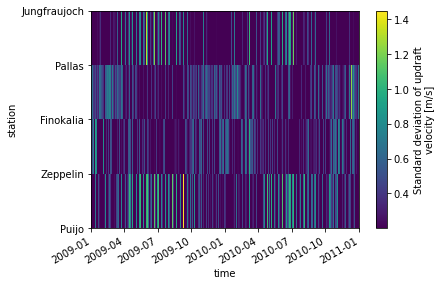

In [50]:
ds_corr_height['WTKE'].plot()

In [51]:
ds_corr_height

<xarray.Dataset>
Dimensions:             (time: 5841, station: 5)
Coordinates:
  * time                (time) datetime64[ns] 2009-01-01 ... 2011-01-01
  * station             (station) <U12 'Puijo' 'Zeppelin' ... 'Jungfraujoch'
Data variables: (12/27)
    ACTNL               (station, time) float32 ...
    ACTREI              (station, time) float32 ...
    ACTREL              (station, time) float32 ...
    AREL                (station, time) float32 ...
    AWNC                (station, time) float32 ...
    CLDTOT              (station, time) float32 ...
    ...                  ...
    T                   (station, time) float32 ...
    WSUB                (station, time) float32 ...
    WSUBI               (station, time) float32 ...
    WTKE                (station, time) float32 ...
    AWNC_incld          (station, time) float32 nan nan nan nan ... nan nan nan
    ACTNL_incld         (station, time) float32 nan nan nan ... nan 3.199e+08

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/plot/plot.py:1476: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  primitive = ax.pcolormesh(x, y, z, **kwargs)


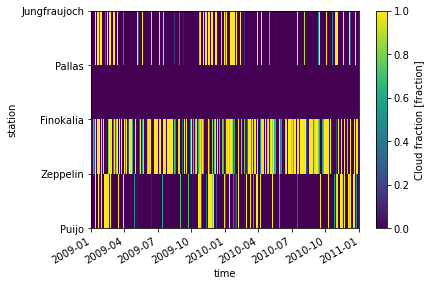

In [52]:
ds_corr_height['CLOUD'].plot()

## Geopotential height to geometrical height: 
Ref: https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.geopotential_to_height.html


In [53]:
Ravg  = 6.371000e6#meters
g = 9.81

In [54]:
Ravg/1000

6371.0

In [55]:
def geop_to_geom(Z):
    return g*(Z*Ravg)/(g*Ravg-Z)

In [56]:
geop_to_geom(100)

100.00016000151041

In [57]:
Z = np.linspace(0,10000)
zgeom = geop_to_geom(Z)

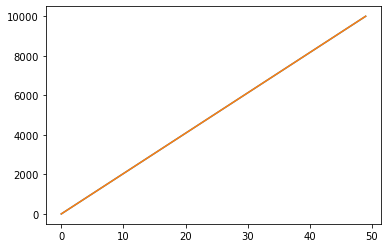

In [58]:
plt.plot(Z)
plt.plot(zgeom)